In [1]:
import numpy as np
import pandas
from matplotlib import pyplot as pltfrom 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
path='diabetes.csv'
data=pandas.read_csv(path)

print(data.shape)
data.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
from sklearn.model_selection import RepeatedKFold

kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
x=data.values[:,0:-1]
y=data.values[:,-1]
RepeatedKFoldAcc=[]
for train_index, test_index in kf.split(data):
    model = KNeighborsClassifier(n_neighbors=5)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train,y_train)
    RepeatedKFoldAcc.append(model.score(x_test, y_test))
print("cross validation score",np.mean(RepeatedKFoldAcc))

cross validation score 0.7109362532891946


In [5]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None)# X is the feature set and y is the target
StratifiedKFoldAcc=[]
x=data.values[:,0:-1]
y=data.values[:,-1]
for train_index, test_index in skf.split(x,y): 
    model = KNeighborsClassifier(n_neighbors=5)
    x_train, x_test = x[train_index], x[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train,y_train)
    StratifiedKFoldAcc.append(model.score(x_test, y_test))
print("cross validation score",np.mean(StratifiedKFoldAcc))

cross validation score 0.723979288685171


In [8]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)# X is the feature set and y is the target
RepeatedKFoldAcc=[]
x=data.values[:,0:-1]
y=data.values[:,-1]
for train_index, test_index in rkf.split(x):
    model = KNeighborsClassifier(n_neighbors=5)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train,y_train)
    RepeatedKFoldAcc.append(model.score(x_test, y_test))
print("cross validation score",np.mean(StratifiedKFoldAcc))

cross validation score 0.723979288685171


No handles with labels found to put in legend.


1


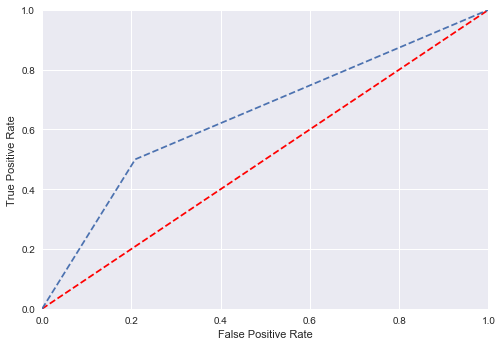

No handles with labels found to put in legend.


3


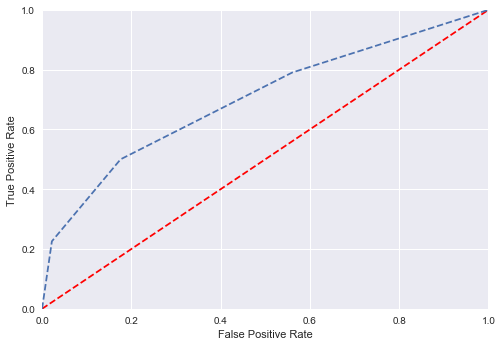

No handles with labels found to put in legend.


5


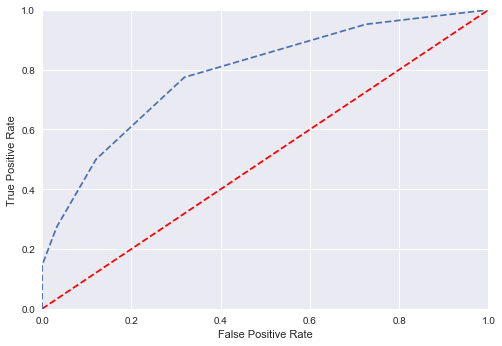

No handles with labels found to put in legend.


7


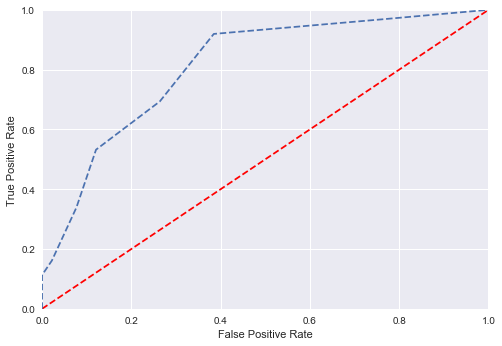

No handles with labels found to put in legend.


9


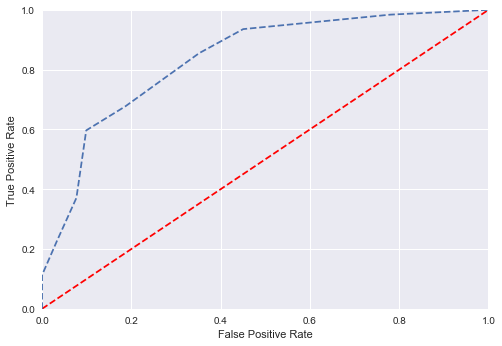

No handles with labels found to put in legend.


11


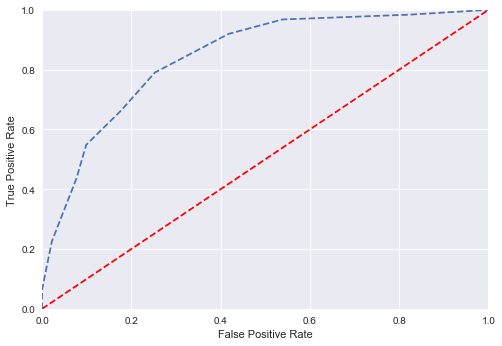

No handles with labels found to put in legend.


13


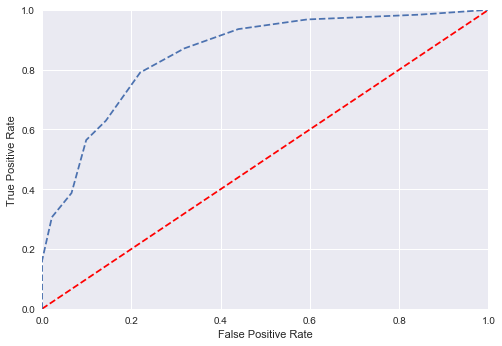

No handles with labels found to put in legend.


15


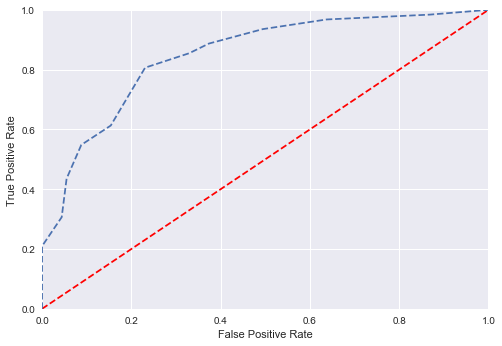

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

x=data.values[:,0:-1]
y=data.values[:,-1]
for k in range(1,16,2):
    print(k)
    classifier = KNeighborsClassifier(n_neighbors=k)  
    model.fit(x_train,y_train)
    classifier.fit(x_train, y_train)
    y_pred =classifier.predict_proba(x_test)
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])
    roc_auc = roc_auc_score(y_test, y_pred[:, 1])
    plt.legend(loc = 'lower right') #Set Legend at lower rights
    plt.plot([0, 1], [0, 1],'r--')#Set baseline model as diagonal
    plt.xlim([0, 1])# Set x axis limits
    plt.ylim([0, 1])# Set y axis limits
    plt.ylabel('True Positive Rate')# y label
    plt.xlabel('False Positive Rate')# x label
    plt.plot(fpr, tpr, linestyle='--',  label = 'AUC = %0.2f' %roc_auc)# plot roc curves
    plt.show();